### Import importantant Libraries 

In [12]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import bokeh as bkh
import matplotlib.pyplot as plt


# All outputs are visible
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
#Retina resolution for the plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
# All plots contained in the notebook
%matplotlib inline

# visualization library
import seaborn as sns
sns.set( color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24}) 




### Lets acquire all the experiments to import them more conveniently

In [13]:
from os import listdir
from os.path import isfile, join

data = "data"
experiment_csvs = [("/data/" + f) for f in listdir(data) if isfile(join(data, f))]
print("The current experiment list is:")
for file in experiment_csvs:
    print(file)

The current experiment list is:
/data/empty.txt
/data/experiment_2018-07-10.22:19:31.csv
/data/experiment_2018-07-11.21:06:31.csv
/data/experiment_2018-06-28.11:09:41.csv
/data/experiment_2018-06-28.21:30:23.csv
/data/experiment_2018-06-29.09:26:39.csv
/data/experiment_2018-07-03.08:34:40.csv
/data/experiment_2018-07-01.12:42:11.csv


### Let's define the names of the classes

In [14]:
names = ["id","Vertex","Edge",
         'T-Tarjan','S-Tarjan',
         'T-Nuutila Original','S-Nuutila Original', 
         'T-Nuutila Version1','S-Nuutila Version1',
         'T-Nuutila Version2','S-Nuutila Version2', 
         'T-Pearson Version1','S-Pearson Version1',
         'T-Pearson Version2','S-Pearson Version2',
         'T-Pearson Version3','S-Pearson Version3']
for n in names:
    print(n)

id
Vertex
Edge
T-Tarjan
S-Tarjan
T-Nuutila Original
S-Nuutila Original
T-Nuutila Version1
S-Nuutila Version1
T-Nuutila Version2
S-Nuutila Version2
T-Pearson Version1
S-Pearson Version1
T-Pearson Version2
S-Pearson Version2
T-Pearson Version3
S-Pearson Version3


Get the latest experiment

In [15]:
print(experiment_csvs[1])
df = pd.read_csv(experiment_csvs[1][1:],sep=',',names=names)
df.shape
df.describe()

/data/experiment_2018-07-10.22:19:31.csv


,id,Vertex,Edge,T-Tarjan,S-Tarjan,T-Nuutila Original,S-Nuutila Original,T-Nuutila Version1,S-Nuutila Version1,T-Nuutila Version2,S-Nuutila Version2,T-Pearson Version1,S-Pearson Version1,T-Pearson Version2,S-Pearson Version2,T-Pearson Version3,S-Pearson Version3
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,378.500000,123.908971,15130.622691,656.233926,2.420097,2.068216,3.872155,2.396455,3.837369,1.981030,2.926415,2.028478,3.837369,1.406797,1.421179,6.579406,4.805408
std,218.960042,150.590080,34609.395032,1627.716611,2.941213,4.405809,4.705939,8.296365,4.703181,4.299888,3.531098,4.259254,4.703181,3.030427,1.765195,14.968441,5.879282
min,0.000000,5.000000,0.000000,0.042392,0.097656,0.005623,0.156250,0.003764,0.117188,0.004020,0.136719,0.004643,0.117188,0.002917,0.023438,0.011621,0.156250
25%,189.250000,23.000000,106.000000,1.071962,0.449219,0.064575,0.718750,0.047428,0.679688,0.044774,0.558594,0.057885,0.679688,0.035102,0.230469,0.121580,0.851562
50%,378.500000,38.000000,504.500000,6.302295,0.742188,0.184495,1.187500,0.154023,1.156250,0.140458,0.912109,0.185379,1.156250,0.106911,0.429688,0.415783,1.468750
75%,567.750000,225.500000,8712.500000,252.508500,4.404295,1.479903,7.046875,1.504687,6.968752,1.379507,5.304690,1.565952,6.968752,1.048847,2.612303,4.550793,8.712892
max,757.000000,498.000000,209498.000000,11357.100000,9.726560,27.643700,15.562500,192.514000,15.554700,40.962900,11.851600,27.915900,15.554700,21.281200,5.832030,150.269000,19.445300


Now we separate the Storage Columns

In [20]:
df_storage_all = df[['Vertex','S-Tarjan',
                 'S-Nuutila Original', 
                 'S-Nuutila Version1',
                 'S-Nuutila Version2', 
                 'S-Pearson Version1',
                 'S-Pearson Version2',
                'S-Pearson Version3']]
df_storage_all = df_storage_all.sort_values(by=['Vertex']);
df_storage_all.head()

df_storage_nuutila = df_storage_all[['Vertex',
                                     'S-Nuutila Original', 
                                     'S-Nuutila Version1',
                                     'S-Nuutila Version2', ]]
df_storage_pearce = df_storage_all[['Vertex',
                                   'S-Pearson Version1',
                                    'S-Pearson Version2',
                                    'S-Pearson Version3']]

In [25]:
def plot_storage(df):
    plt.figure(figsize = (20,16))
    for i in range(1,len(df.columns)):
        plt.plot(df['Vertex'],df[df.columns[i]])
    plt.legend(loc='best')    
    plt.xlabel('Vertex Count')
    plt.ylabel('Kilobytes')

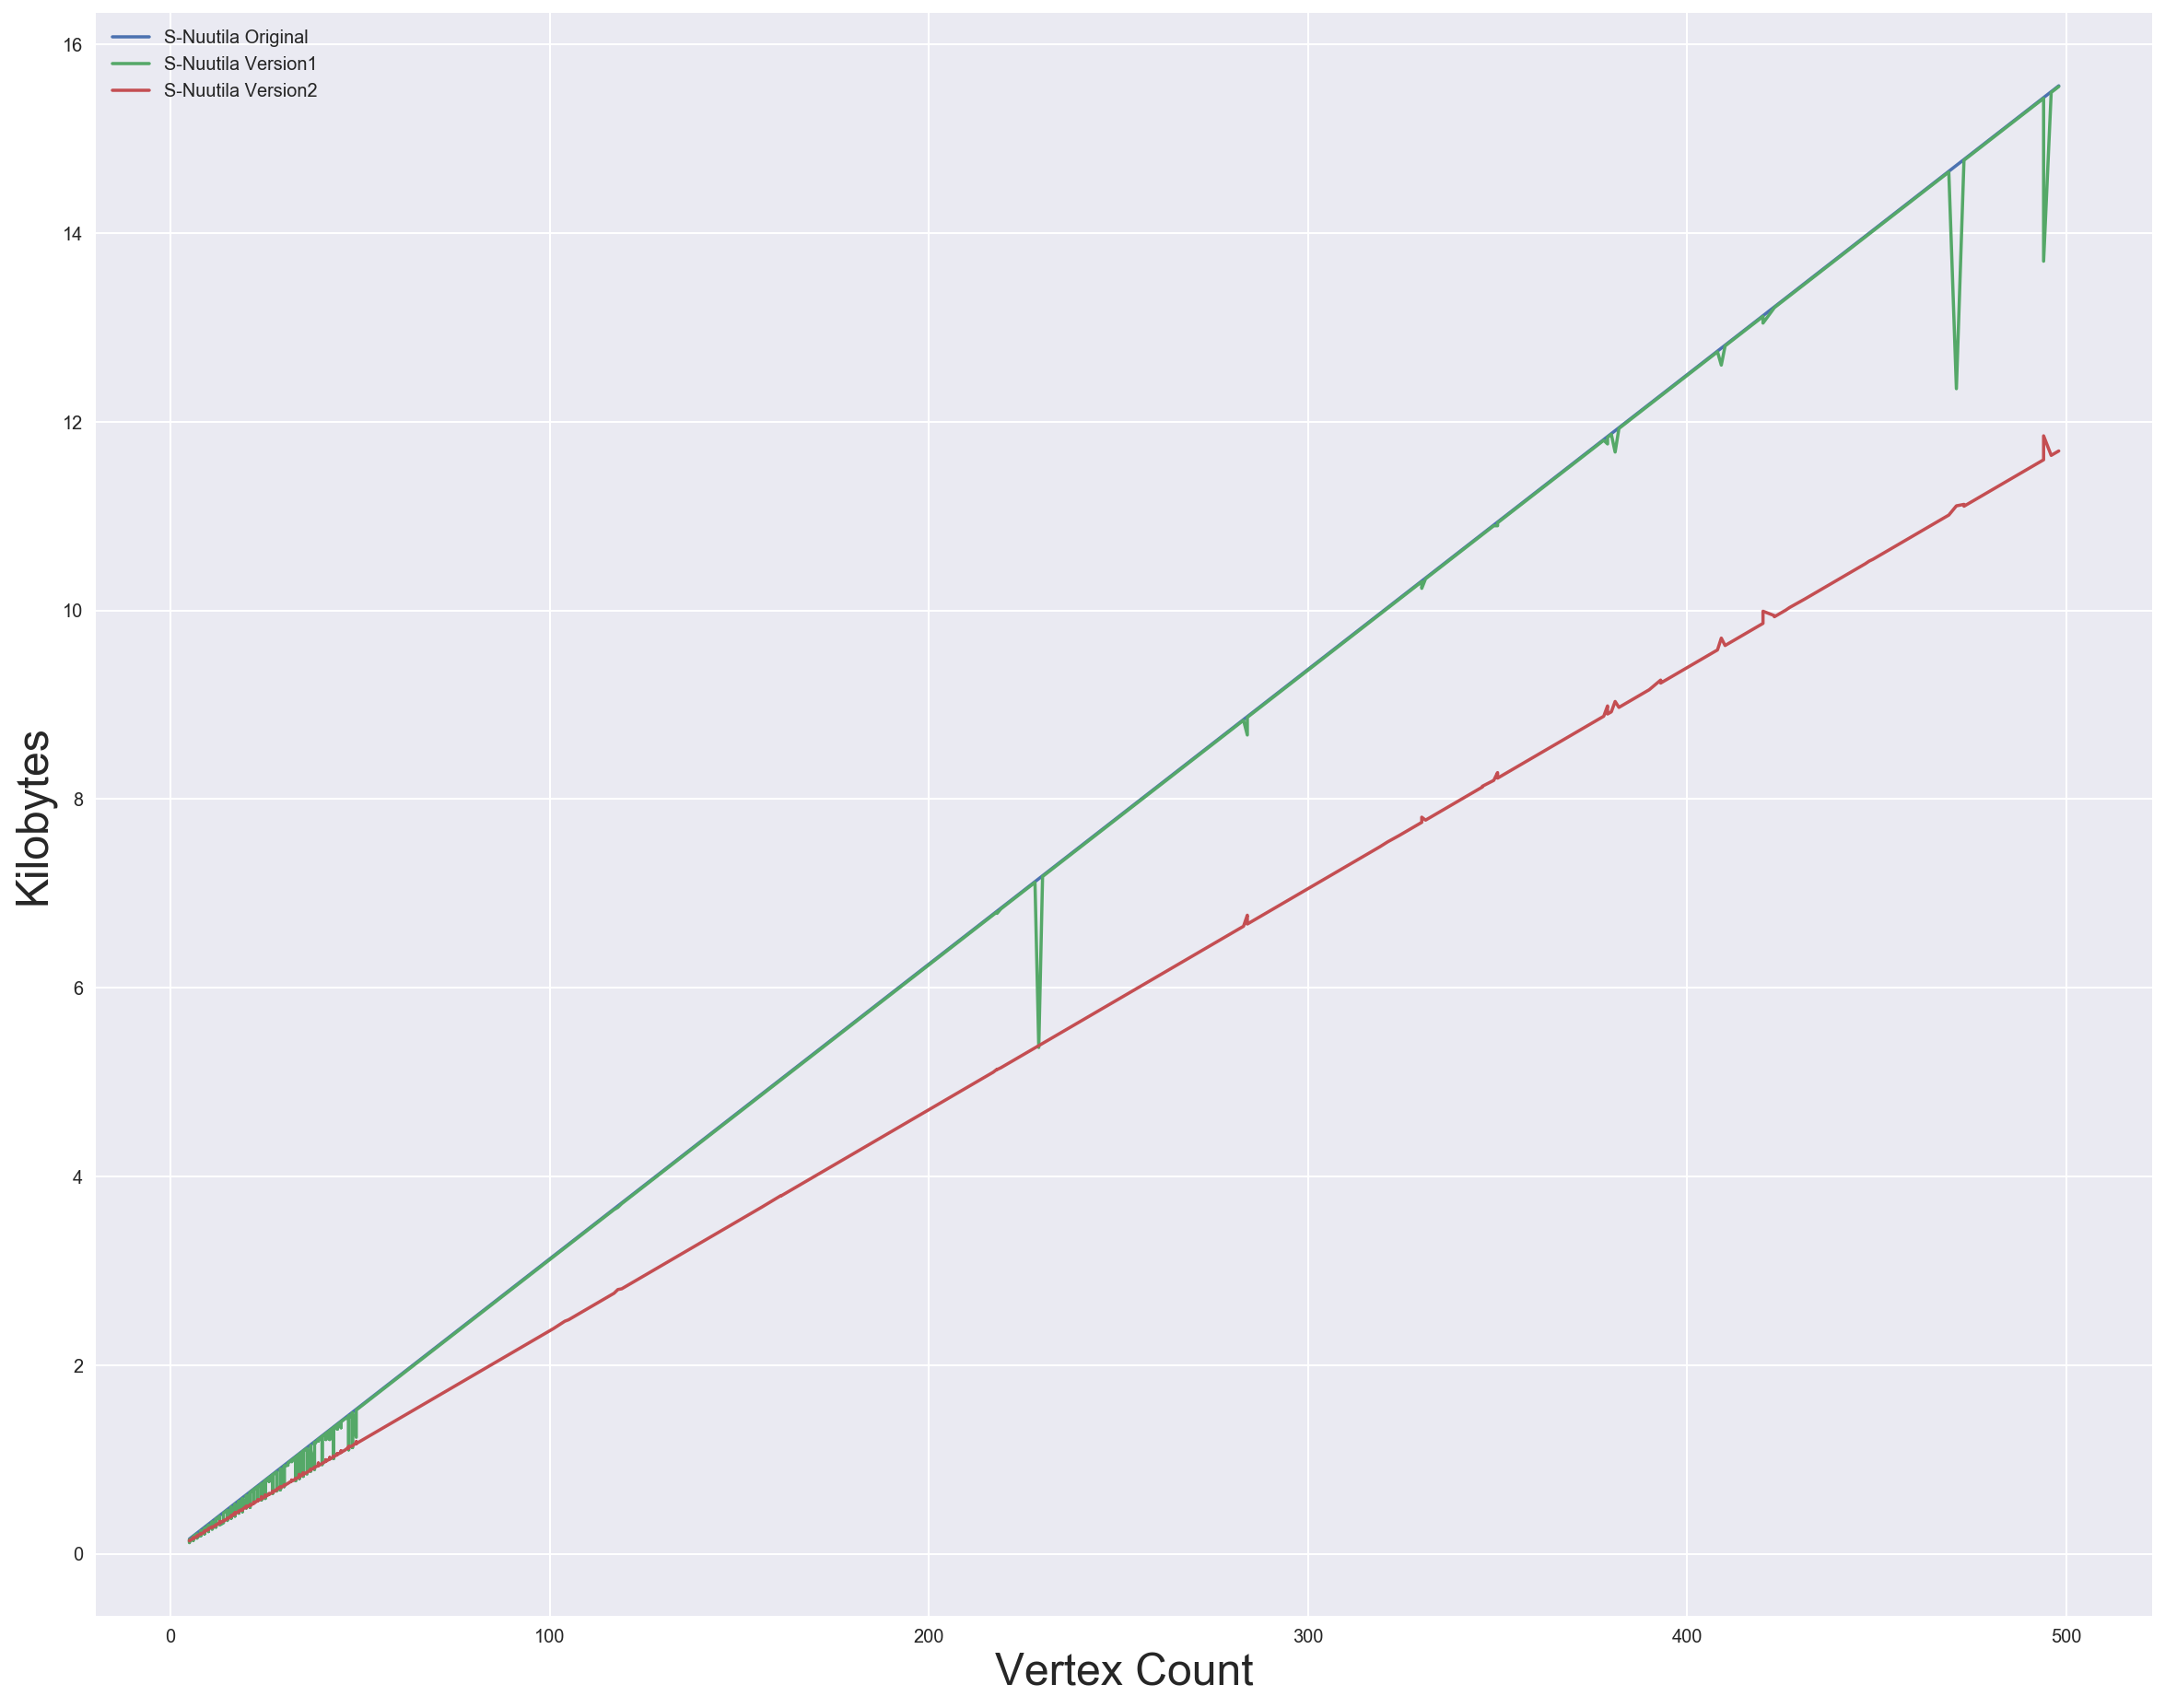

In [26]:
plot_storage(df_storage_nuutila)

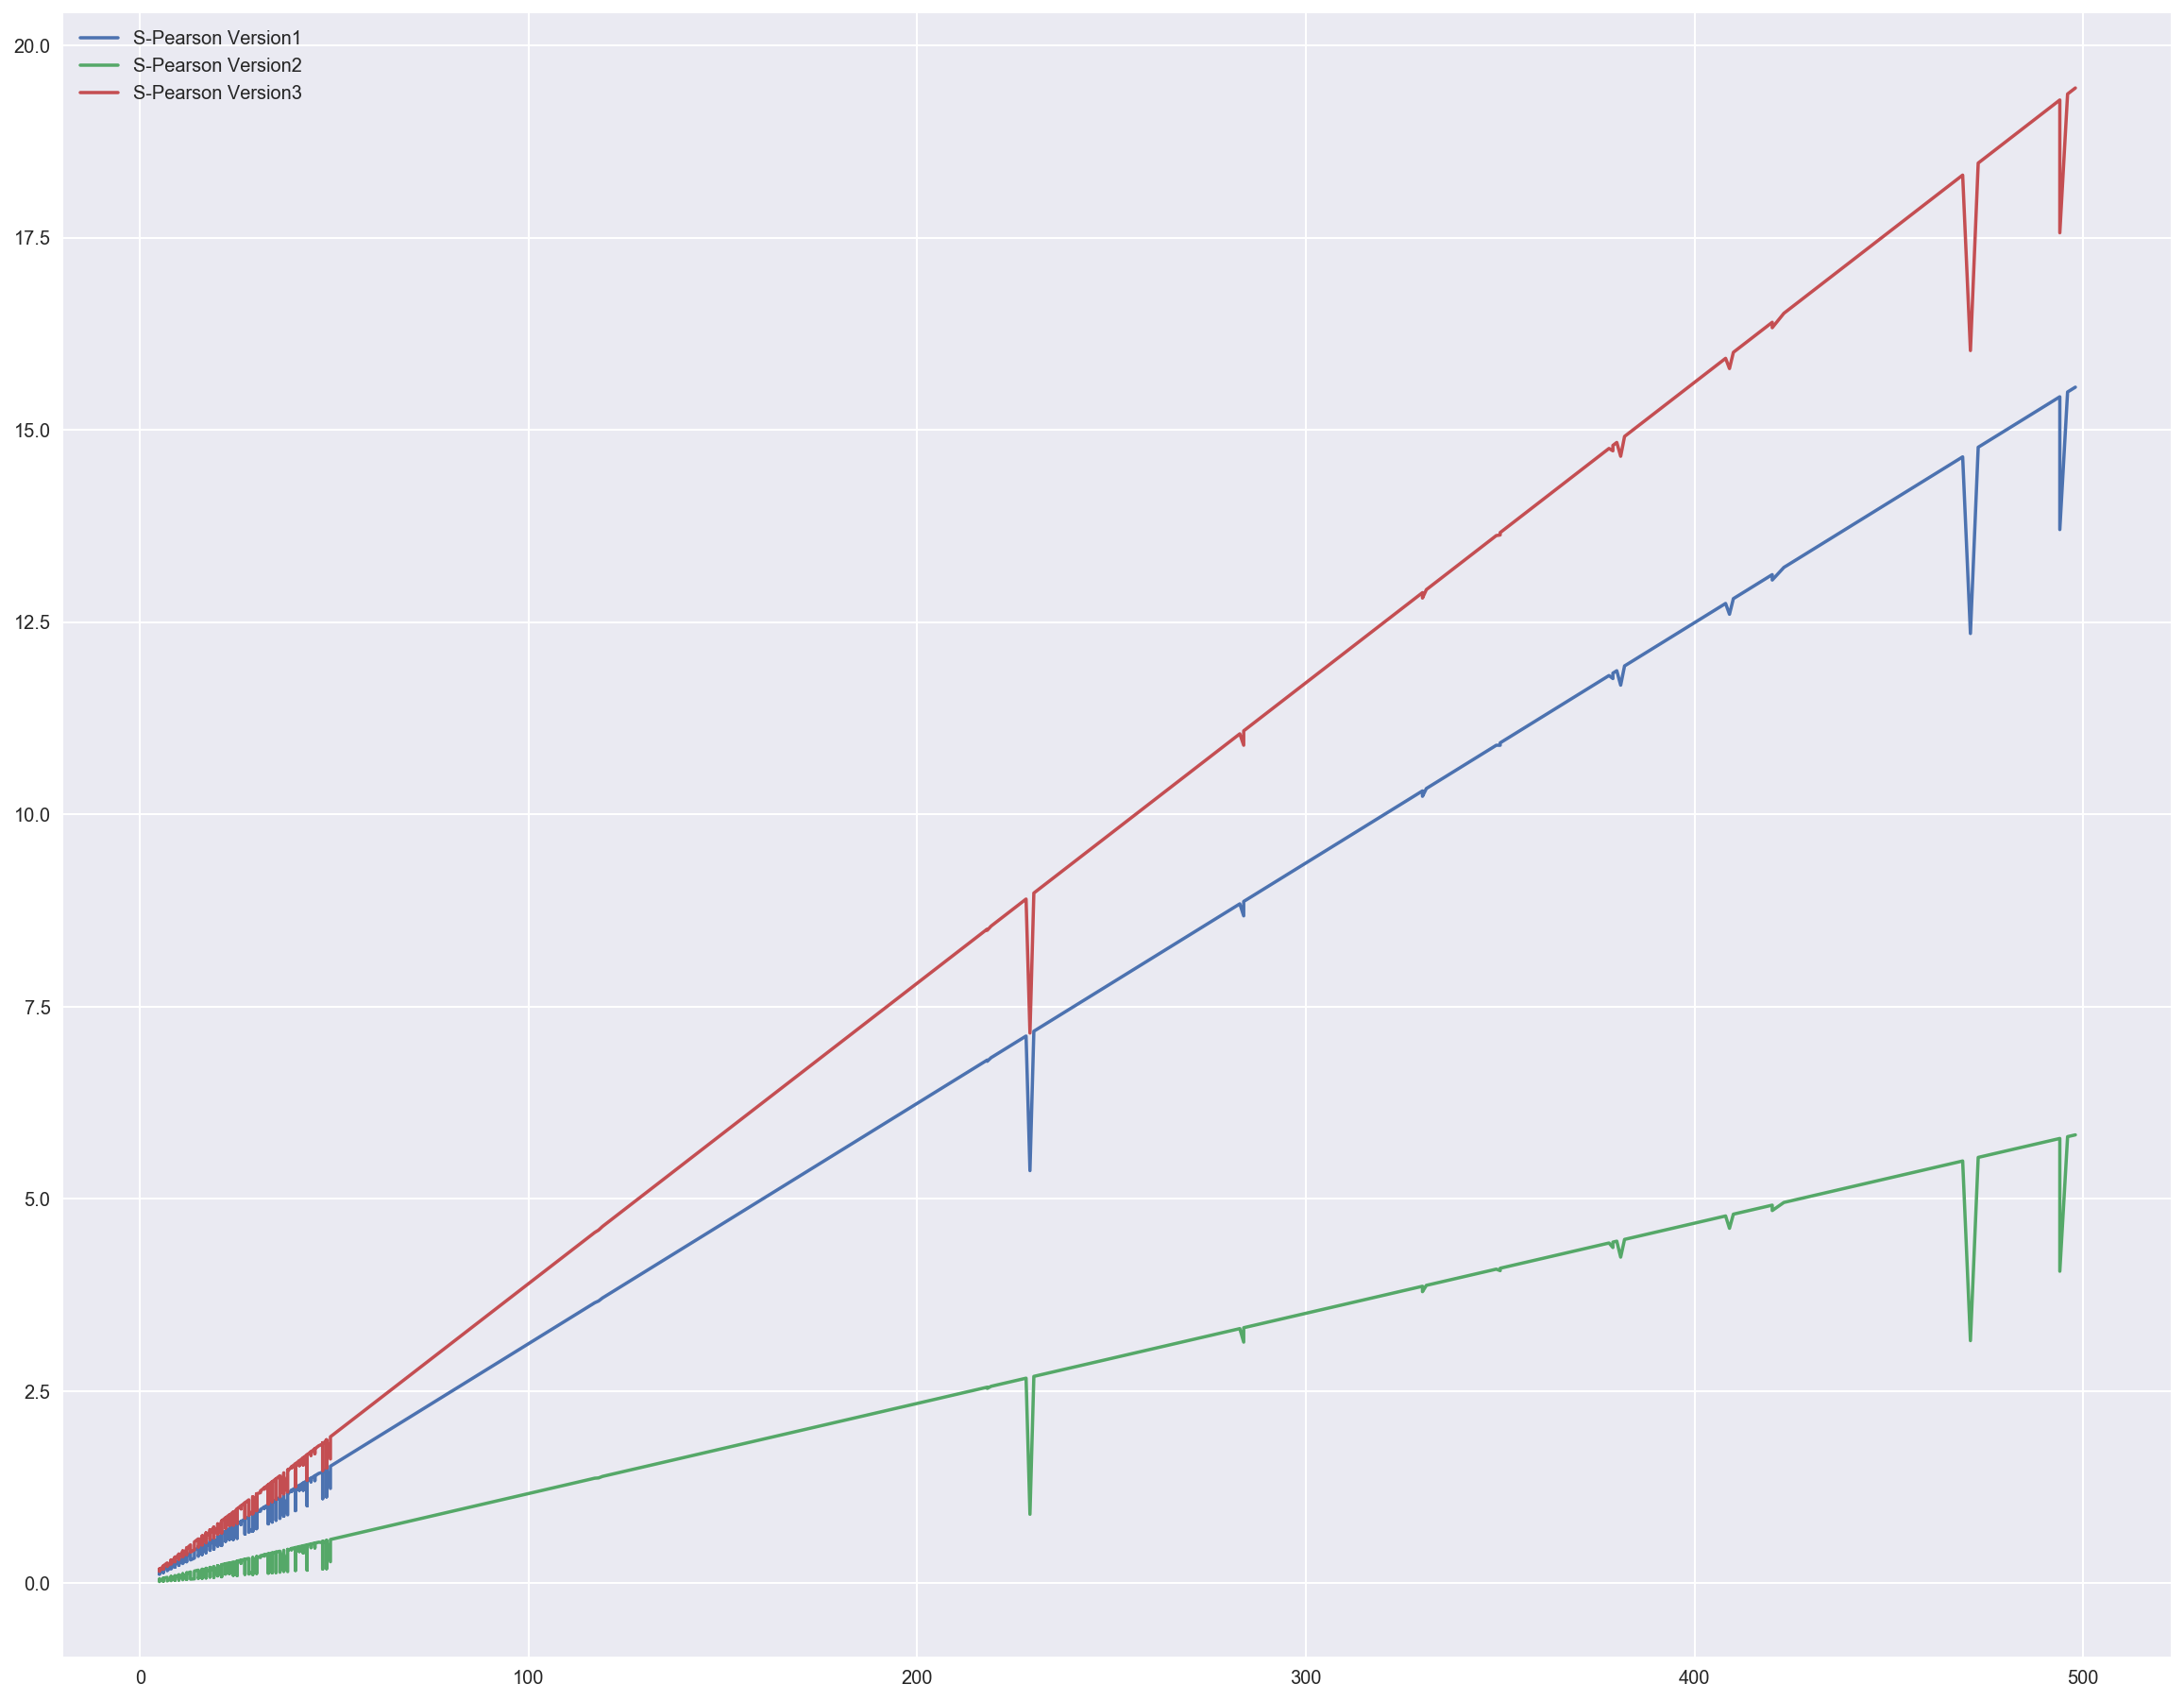

In [23]:
plot_storage(df_storage_pearce)

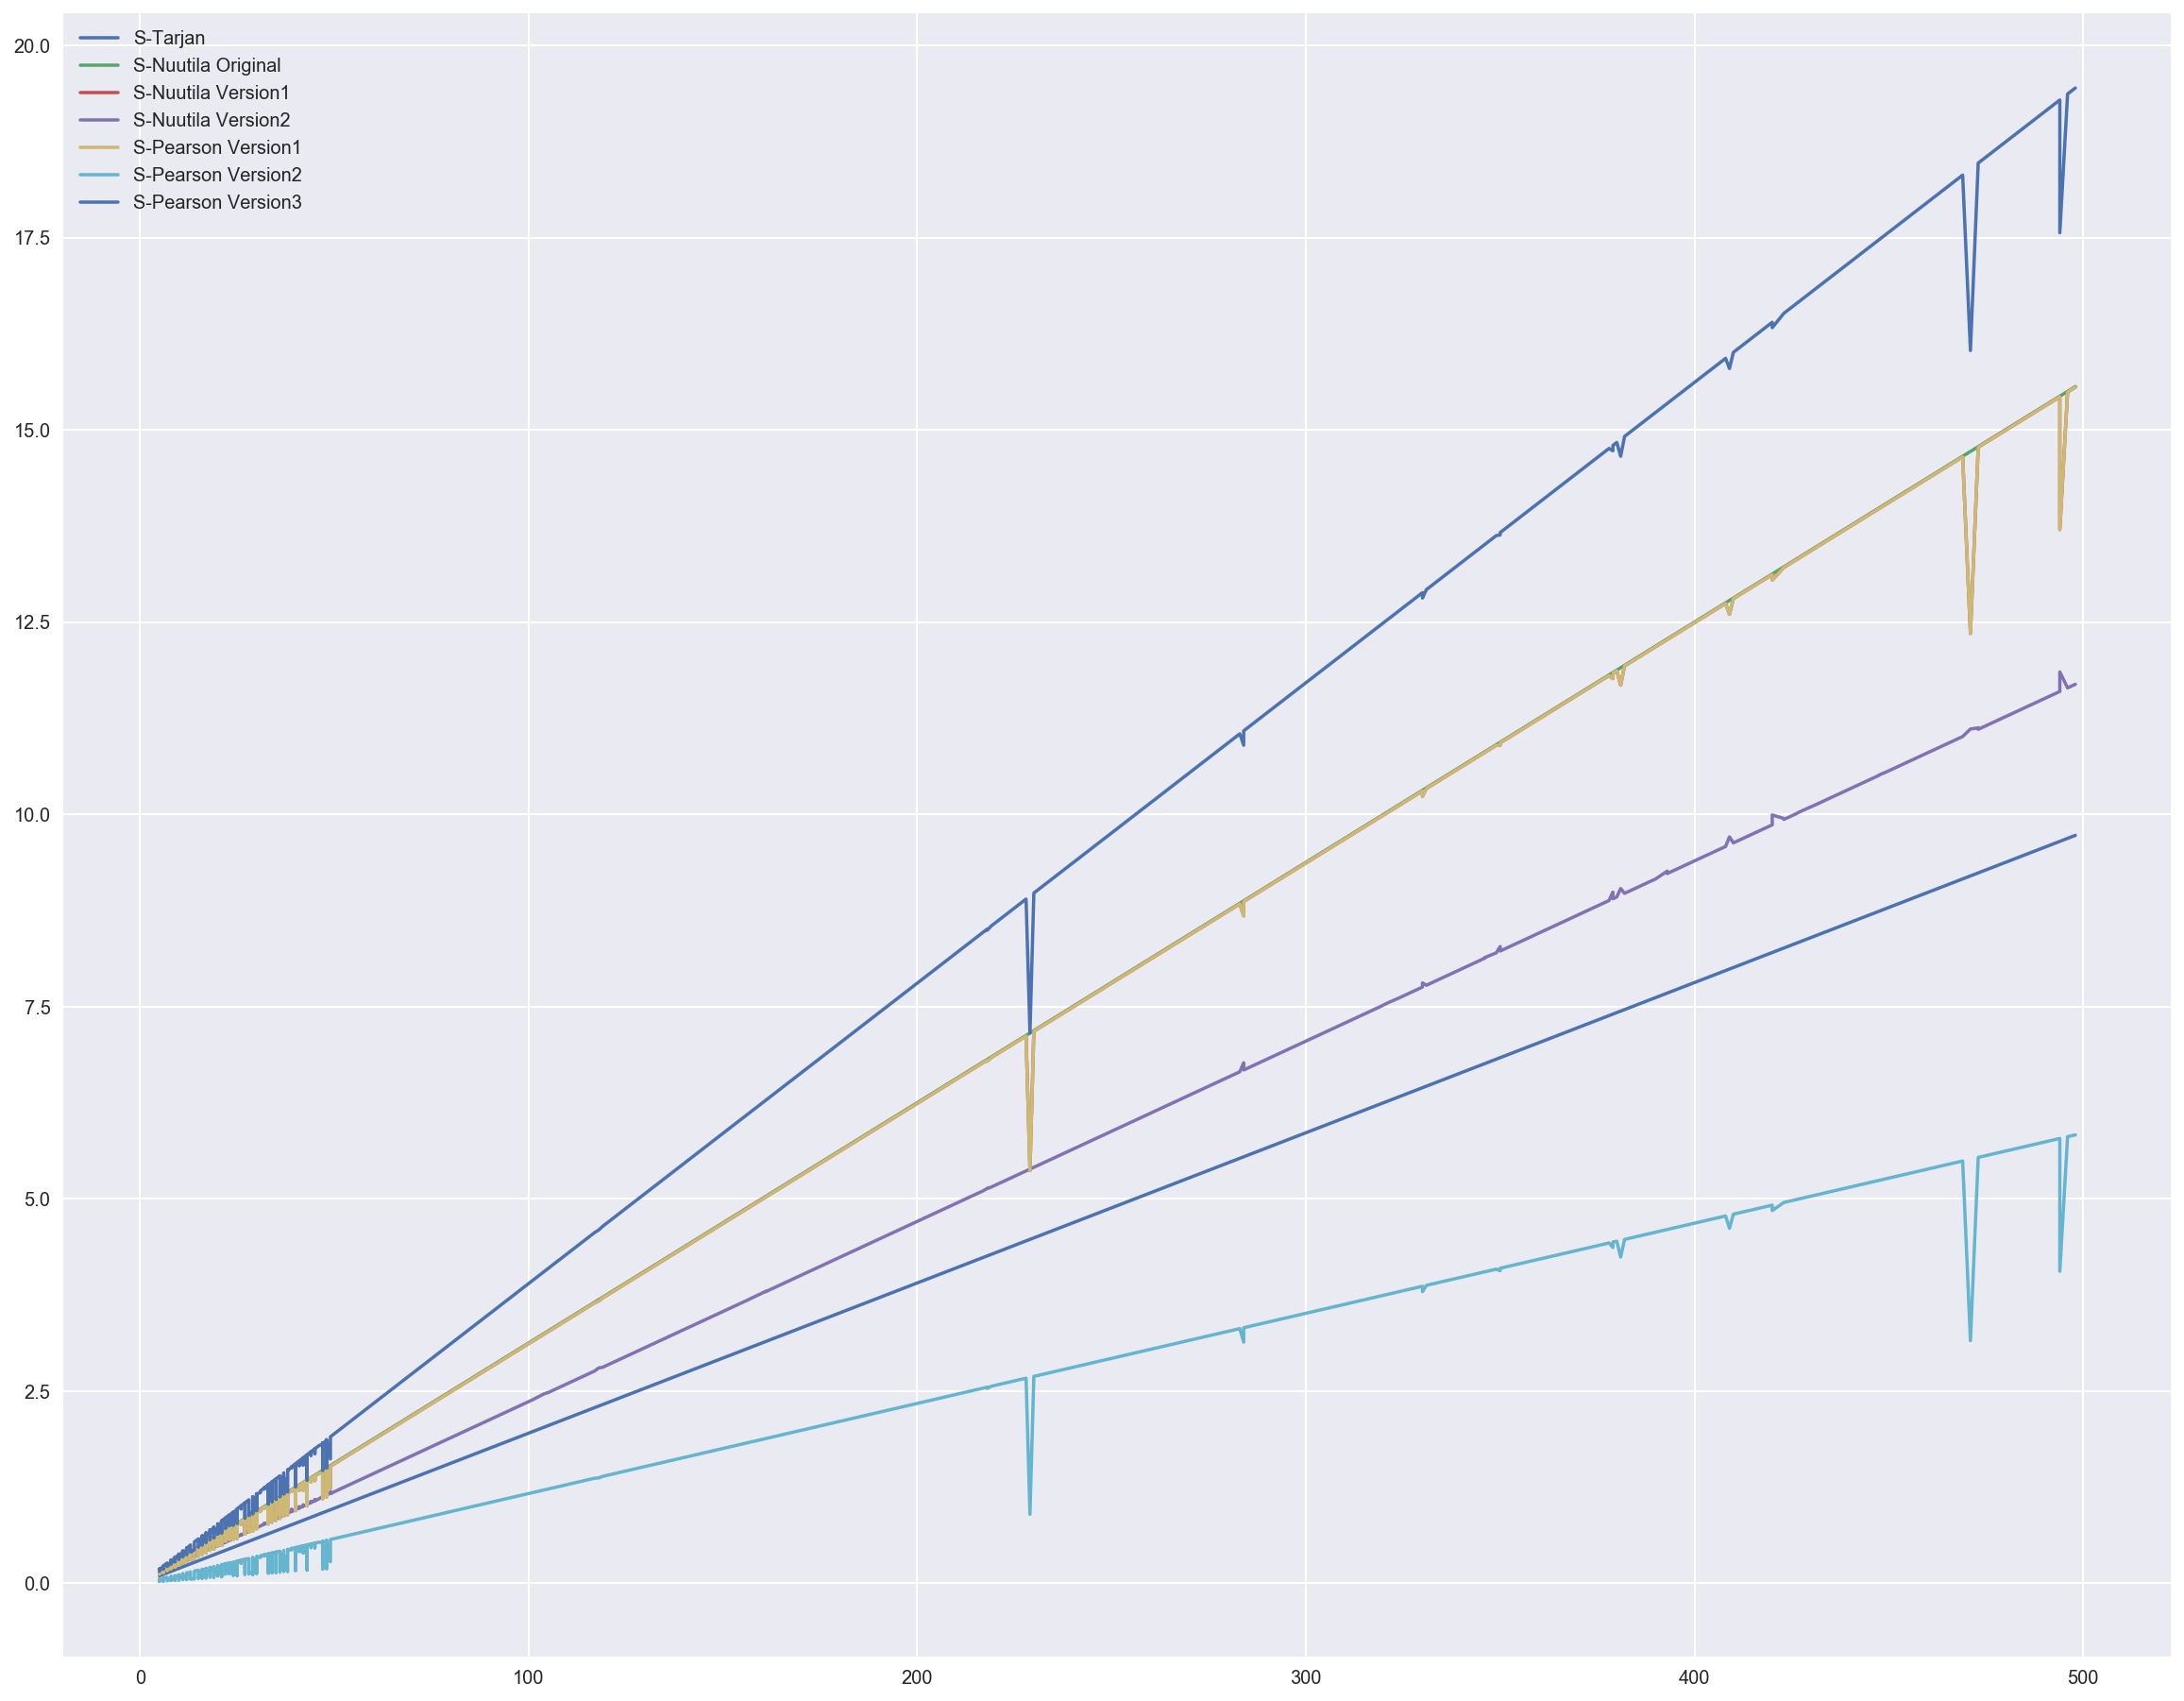

In [24]:
plot_storage(df_storage_all)